diag_len 13
x []
y []
len(accumulator) 26
accumulator [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
len(maxima) 26
maxima [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
slices []
ax AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1000x1000 with 0 Axes>

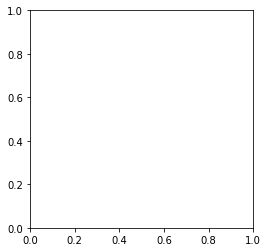

<Figure size 1000x1000 with 0 Axes>

In [68]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans

os.chdir('C:\\Github\\repository\\image_classification')

#def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    # Rho and Theta ranges
angle_step = 1
thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
#width, height = img.shape
width = 9#200000
height = 9#200000
diag_len = int(round(math.sqrt(width * width + height * height)))
rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
print('diag_len',diag_len)
# Cache some resuable values
cos_t = np.cos(thetas)
sin_t = np.sin(thetas)
num_thetas = len(thetas)

# Hough accumulator array of theta vs rho
accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
#print('accumulator',accumulator)
# (row, col) indexes to edges
#print('img',img)
#are_edges = img > value_threshold if lines_are_white else img < value_threshold
#print('are_edges',are_edges)
#y_idxs, x_idxs = np.nonzero(are_edges)
x_idxs = np.array([1,2,3])
y_idxs = np.array([1,2,3])
#print('y_idxs',y_idxs)
#print('x_idxs',x_idxs)
# Vote in the hough accumulator
for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
        # Calculate rho. diag_len is added for a positive index
        rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
        accumulator[rho, t_idx] += 1

neighborhood_size = 20
threshold = 140

data_max = ndimage.maximum_filter(accumulator, neighborhood_size)
maxima = (accumulator == data_max)

data_min = ndimage.minimum_filter(accumulator, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)


line_index = 1

for i,j in zip(y, x):

    r = round( (1.0 * i * r_max ) / r_dim,1)
    theta = round( (1.0 * j * theta_max) / theta_dim,1)

    fig, ax = plt.subplots()
    ax.autoscale(False)

    px = []
    py = []
    for i in range(-y_max-40,y_max+40,1):
        px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
        py.append( math.sin(-theta) * i + math.cos(-theta) * r )

    ax.plot(px,py, linewidth=10)

    plt.savefig("image_line_"+ "%02d" % line_index +".png",bbox_inches='tight')

print('x',x)
print('y',y)
print('len(accumulator)',len(accumulator))
print('accumulator',accumulator)
print('len(maxima)',len(maxima))
print('maxima',maxima)
print('slices',slices)
#print('thetas', thetas)
#print('rhos', rhos)
# imgpath = 'C:\\Github\\repository\\hough_transform-master\\imgs\\binary_crosses.png'
# img = imageio.imread(imgpath)
#ht.show_hough_line(img, accumulator, thetas, rhos, width, height)#, save_path='C:\\Github\\repository\\hough_transform-master\\imgs\\output.png')
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

print('ax',ax)
# ax[1].set_aspect('equal', adjustable='box')
# ax[1].set_title('Hough transform')
# ax[1].set_xlabel('Angles (degrees)')
# ax[1].set_ylabel('Distance (microns)')
# ax[1].axis('image')
plt.figure(figsize=[10,10], dpi=100)
# plt.savefig('C:\\Github\\repository\\hough_transform-master\\imgs\\output.png', bbox_inches=trans.Bbox([[0,1],[0,1]]))
#plt.show()
